In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [2]:
def load_dataset(data_folder):
    images = []
    labels = []
    for subject_id in range(1, 11):
        subject_folder = os.path.join(data_folder, str(subject_id))
        for img_name in os.listdir(subject_folder):
            img_path = os.path.join(subject_folder, img_name)
            img = Image.open(img_path)
            img_np = np.array(img)
            print(img_np.shape)
            images.append(img_np.flatten())
            labels.append(subject_id)
    return np.array(images), np.array(labels)


In [3]:
def PCA(trn_I, trn_lbl):
    trn_I = trn_I.T  # (5600,16)
    mean = np.mean(trn_I, axis = 1) # along row, or axis 1
    print(mean.shape)
    mean = mean.reshape(mean.shape[0], 1)
    print(mean.shape)

    print(trn_I)
    # broadcasting
    trn_I = trn_I - mean
    print(trn_I)
    
    cov = np.matmul(trn_I.T, trn_I) # (16,16)
    print(cov.shape)
    ev,EV_pseudo = np.linalg.eig(cov)
    EV = np.matmul(trn_I, EV_pseudo)  #(5600, 16)
    print(EV.shape)
    
    fig, axes = plt.subplots(10,1, figsize=(50, 50))  # top ten
    for i in range(10):  # 16 0->15
        temp = EV[:,i].reshape(80,70)
        axes[i].imshow(temp)
    # normalize the eigvctrs
    EV = normalize(EV, norm="l2", axis=1)
    print(EV.shape)
    
    print(ev)
    print(ev.shape)
    idx = np.argsort(ev)
    idx = np.flip(idx) #inc-->dec
    ev = ev[idx]
    print(ev.shape)
    EV = EV[:, idx]
    print(EV.shape)
    return ev, EV, mean
    

In [9]:
imgs, lbls = load_dataset('C:\\Users\\hj191\\Downloads\\data\\data1')

# split
trn_I, tst_I, trn_lbl, tst_lbl = train_test_split(imgs, lbls, test_size = 0.5, random_state = 0)
trn_I.shape

(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)


(50, 5600)

(5600,)
(5600, 1)
[[106 117  21 ...  50  97  95]
 [124 140  33 ...  60 116 113]
 [115 132  30 ...  55 106 105]
 ...
 [ 19  92  29 ...  63  74  72]
 [ 25  99  34 ...  65  76  78]
 [ 31  80  26 ...  52  62  64]]
[[ 28.58  39.58 -56.42 ... -27.42  19.58  17.58]
 [ 30.32  46.32 -60.68 ... -33.68  22.32  19.32]
 [ 27.28  44.28 -57.72 ... -32.72  18.28  17.28]
 ...
 [-37.8   35.2  -27.8  ...   6.2   17.2   15.2 ]
 [-36.5   37.5  -27.5  ...   3.5   14.5   16.5 ]
 [-20.06  28.94 -25.06 ...   0.94  10.94  12.94]]
(50, 50)
(5600, 50)
(5600, 50)
[ 6.34298977e+07  4.85425222e+07  3.86723551e+07  3.44919643e+07
  2.19041874e+07  1.71909995e+07  1.29844463e+07  1.13478900e+07
  8.95076702e+06  7.70272931e+06  7.01624692e+06  6.06461350e+06
  5.59359152e+06  5.03482108e+06  4.31272839e+06  4.12934264e+06
  3.89740453e+06  3.35152746e+06 -1.19637417e-09  3.02971779e+06
  3.00930190e+06  2.80160398e+06  2.57634364e+06  2.49125299e+06
  2.29638408e+06  2.16119111e+06  2.10904563e+06  2.00640184e+06
  1.

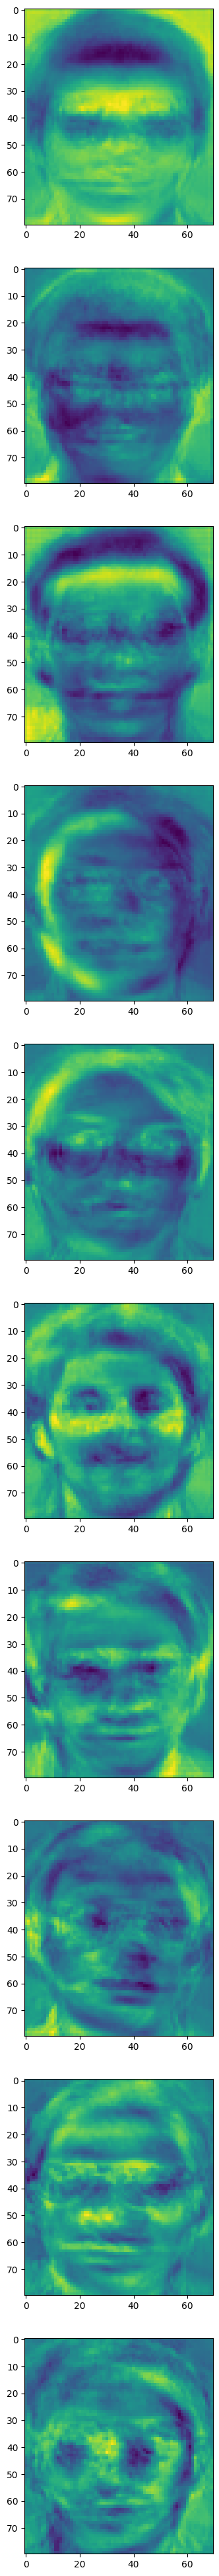

In [10]:
ev_PCA, EV_PCA, mean = PCA(trn_I, trn_lbl)


In [11]:
trn_I.shape

(50, 5600)

In [12]:
n,d = trn_I.shape

c = len(np.unique(trn_lbl))
c

10

In [13]:
# Fisherfaces, avoids this problem by
# projecting the image set to a lower dimensional space so
# that the resulting within-class scatter matrix S W is nonsin-
# gular. This is achieved by using PCA to reduce the dimen-
# sion of the feature space to N - c, and then applying the
# standard FLD defined by (4) to reduce the dimension to c - 1.
# More formally, W opt is given by

In [14]:
EV_PCA.shape

(5600, 50)

In [15]:
EV_PCA = EV_PCA[:, 0:n-c]   # reduce dim to n-c
print(trn_I.shape, mean.shape)

(50, 5600) (5600, 1)


In [16]:
EV_PCA.shape

(5600, 40)

In [17]:
# project imgs to n-c dim using PCA

# zero center
trn_I = trn_I.T - mean
print(trn_I.shape)
print(EV_PCA.shape)

# trn imgs project ev pca (n-c dim)
trn_I_proj = np.matmul(trn_I.T, EV_PCA)
print(trn_I_proj.shape)


(5600, 50)
(5600, 40)
(50, 40)


In [18]:
def fld(imgs, lbls): # returns EV and ev such that fld applied 
    c = np.unique(lbls)
    d = imgs.shape[1]     #  n-c

    Sw = np.zeros((d,d), dtype=np.float32)
    Sb = np.zeros((d,d), dtype=np.float32)
    
    mean_across_class = imgs.mean(axis=0, keepdims = True)  
    print(mean_across_class.shape)

    for cls in range(0,len(c)):
        cls_idxs = np.where(lbls == cls+1)
        print(cls_idxs)
        cls_idxs = cls_idxs[0]
        
        cls_imgs = imgs[cls_idxs]    #images of this class
        cls_N = cls_imgs.shape[0]
        cls_mean = cls_imgs.mean(axis=0, keepdims = True) # mean of class imgs

        Sw = Sw + np.matmul((cls_imgs - cls_mean).T, (cls_imgs - cls_mean))
        Sb = Sb + cls_N * np.matmul((cls_mean - mean_across_class).T, (cls_mean - mean_across_class))

    Sw_inv = np.linalg.inv(Sw)
    ev_fld, EV_fld = np.linalg.eig(Sw_inv * Sb)
    print(EV_fld.shape, ev_fld.shape)

    # choose c-1 evs
    idxs = np.argsort(ev_fld)  # dec -- inc
    idxs = np.flip(idxs)
    ev_fld = ev_fld[idxs]  # arranged
    print(ev_fld.shape)
    
    EV_fld = EV_fld[:, idxs]
    print(EV_fld.shape)

    print(ev_fld)
    ev_fld = ev_fld[0:len(c)-1]
    EV_fld = EV_fld[:, 0:len(c)-1]
    
    return ev_fld, EV_fld


In [19]:
ev, EV_fld = fld(trn_I_proj, trn_lbl)

(1, 40)
(array([ 2, 44], dtype=int64),)
(array([ 6, 10, 18, 20, 37], dtype=int64),)
(array([ 4,  8, 21, 26, 30, 42], dtype=int64),)
(array([ 3,  7, 11, 16, 31, 34, 41], dtype=int64),)
(array([22, 33, 48, 49], dtype=int64),)
(array([ 1,  5,  9, 13, 36], dtype=int64),)
(array([12, 25, 35, 46, 47], dtype=int64),)
(array([14, 28, 29, 39], dtype=int64),)
(array([15, 17, 19, 32, 38, 40, 43], dtype=int64),)
(array([ 0, 23, 24, 27, 45], dtype=int64),)
(40, 40) (40,)
(40,)
(40, 40)
[1.69235429e+04 1.45285628e+04 1.32764662e+04 9.35500138e+03
 6.73169641e+03 3.52927124e+03 2.56463226e+03 1.43946895e+03
 1.01744578e+03 2.16963891e+02 1.34964083e+02 9.75638735e+01
 4.34902419e+01 2.14764815e+01 1.35764156e+01 1.09183502e+01
 5.72892965e+00 2.76367735e+00 2.46209755e+00 1.78411562e+00
 1.26756807e+00 1.02146593e+00 8.27277781e-01 5.47692312e-01
 3.19831546e-01 2.85336029e-01 2.53849941e-01 2.29514068e-01
 1.61967442e-01 1.33756452e-01 1.01645399e-01 8.78243378e-02
 8.35458608e-02 7.22270180e-02 6.5

In [20]:
EV = np.matmul(EV_PCA,EV_fld)
EV.shape

(5600, 9)

In [21]:
def Test(tst_I, tst_lbl, trn_lbl, wts, EV, mean):
    res = []
    tst_wts = np.matmul(EV.T, tst_I)  # (9,50) # wt of each trn_I wrt 9 EV, per column

    fig, axes = plt.subplots(4,1, figsize=(25, 25))

    for i in range(len(tst_lbl)):  # for each  # 50
        
        tst_wt = np.resize(tst_wts[:,i],  (tst_wts.shape[0], 1))  # for ith tst_img, wt wrt 9 EV

        error = (wts - tst_wt)**2   # (9,50) - (9,1)  ==> (9, 50)-(9,50)  # for each trn_I wt see how close ith img wt is 
        
        sq_error = np.sum(error, axis = 0, keepdims = True) #along columns  # (1,50)  # (1, j) error bw wts of ith tst_I img and jth trn_I

        print(sq_error.shape)  # (1, 50)
        # print(sq_error)
        
        matched = sq_error.argmin(axis = 1)
        print(matched)  # least error
        mindist = sq_error[0, matched]  # 
        print(mindist)
        
        label = trn_lbl[matched]
        print(label)
        res.append(label[0])
        if i <= 3:
            temp = tst_I[:,i].reshape(80,70)
            axes[i].imshow(temp)
    print(res)
    print(tst_lbl)
    print(res == tst_lbl)
    return res==tst_lbl

In [22]:
# mean = np.mean(tst_I, axis = 0, keepdim = True)
tst_I = tst_I.T - mean


In [23]:
wts = np.matmul(EV.T, trn_I)
# (9, 50) wt of each trn_I wrt 9 EV

In [24]:
wts.shape

(9, 50)

In [25]:
trn_lbl[30]

3

(1, 50)
[30]
[1.34416759e+08]
[3]
(1, 50)
[15]
[44525727.03759624]
[9]
(1, 50)
[22]
[1.66266994e+09]
[5]
(1, 50)
[1]
[1.30889943e+08]
[6]
(1, 50)
[28]
[1.05529097e+08]
[8]
(1, 50)
[27]
[1.41679258e+08]
[10]
(1, 50)
[20]
[42881857.48914874]
[2]
(1, 50)
[39]
[2.13019136e+08]
[8]
(1, 50)
[1]
[2.5031493e+08]
[6]
(1, 50)
[27]
[5.36343716e+08]
[10]
(1, 50)
[1]
[24700025.44439508]
[6]
(1, 50)
[0]
[3.9710363e+08]
[10]
(1, 50)
[39]
[3.02807258e+08]
[8]
(1, 50)
[6]
[12839389.442516]
[2]
(1, 50)
[2]
[1.34179391e+09]
[1]
(1, 50)
[16]
[1.99500276e+08]
[4]
(1, 50)
[42]
[62006094.82500913]
[3]
(1, 50)
[8]
[60141025.11969871]
[3]
(1, 50)
[41]
[70085904.95295545]
[4]
(1, 50)
[2]
[2.32965474e+08]
[1]
(1, 50)
[33]
[23020666.58195611]
[5]
(1, 50)
[12]
[46667302.97742234]
[7]
(1, 50)
[18]
[1.25380606e+09]
[2]
(1, 50)
[39]
[65384504.13263325]
[8]
(1, 50)
[49]
[31348842.34504939]
[5]
(1, 50)
[48]
[43170543.83500653]
[5]
(1, 50)
[22]
[1.05225536e+09]
[5]
(1, 50)
[27]
[8.77948419e+08]
[10]
(1, 50)
[32]
[986596

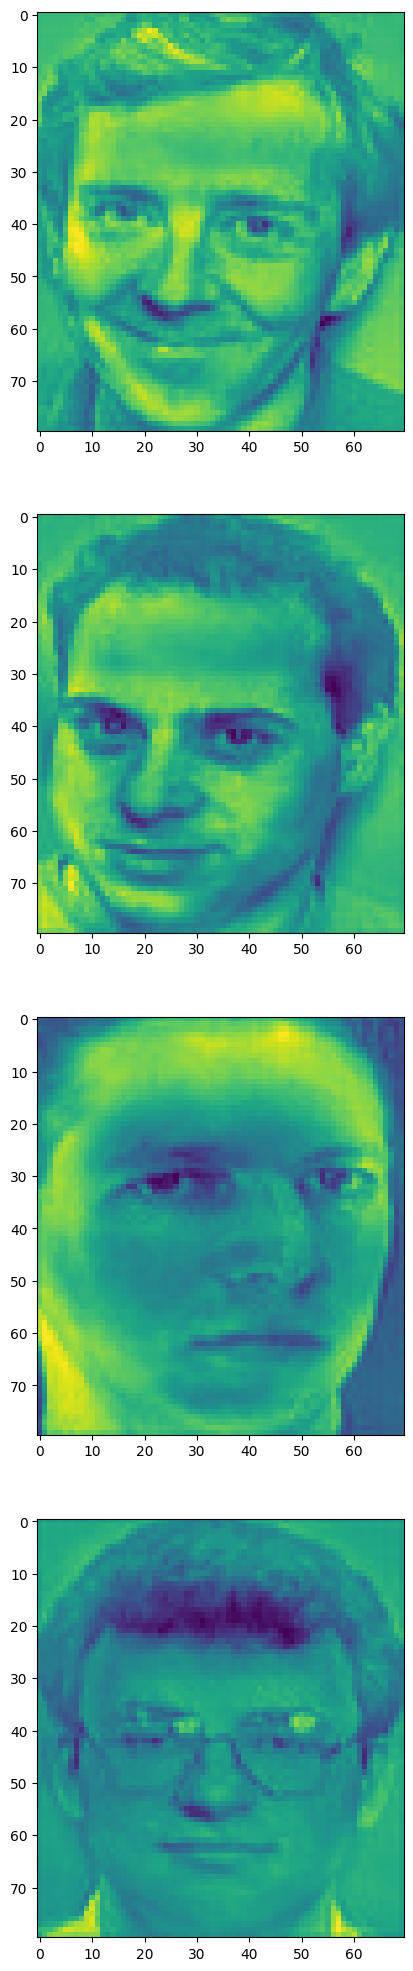

In [26]:
answer = Test(tst_I, tst_lbl, trn_lbl, wts, EV, mean)   # mean of trn_I

In [27]:
accuracy = ((answer).sum())*100/len(answer)
print(accuracy)

90.0
